<a href="https://colab.research.google.com/github/ptsurko/AIML-notebooks/blob/master/Classification_BBC_articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


TensorFlow 2.x selected.


In [3]:
data = pd.read_csv('https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv')
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
data.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,mobiles not media players yet mobiles are no...
freq,511,2


In [0]:
def plot_history(history, metric='mae'):
  epochs=len(history.history['loss'])

  plt.figure(figsize=(20,4))

  plt.subplot(1, 2, 1)
  plt.plot(range(epochs), history.history['loss'], 'b', label='Loss')
  plt.plot(range(epochs), history.history['val_loss'], 'r', label='Val loss')
  plt.xlabel("Epochs")
  plt.title('Loss vs Val loss')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(range(epochs), history.history[metric], 'b', label=metric)
  plt.plot(range(epochs), history.history['val_%s' % metric], 'r', label='Val %s' % metric)
  plt.xlabel("Epochs")
  plt.title('%s vs Val %s' % (metric, metric))
  plt.legend()

  plt.show()

In [0]:
tf.random.set_seed(51)
np.random.seed(51)

data_shuffled = data.sample(frac=1)
# data_shuffled = data
X = data_shuffled['text'].values
y = data_shuffled['category'].values

In [55]:
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)

word_index = tokenizer.word_index
vocab_size=len(word_index)

print('word_index: ', word_index)
print('len(word_index): ', len(word_index))
print('vocab_size: ', vocab_size)

max_length = 16

sequences = tokenizer.texts_to_sequences(X)
sequences = pad_sequences(sequences, padding='post', truncating='post', maxlen=max_length)

encoder = LabelEncoder()
encoder.fit(y)
labels = encoder.transform(y)

print('classes: ', encoder.classes_)

word_index:  {'<OOV>': 1, 'the': 2, 'to': 3, 'of': 4, 'and': 5, 'a': 6, 'in': 7, 's': 8, 'for': 9, 'is': 10, 'that': 11, 'it': 12, 'on': 13, 'said': 14, 'was': 15, 'he': 16, 'be': 17, 'with': 18, 'as': 19, 'has': 20, 'have': 21, 'at': 22, 'by': 23, 'will': 24, 'but': 25, 'are': 26, 'i': 27, 'from': 28, 'not': 29, 'they': 30, 'his': 31, 'we': 32, 'mr': 33, 'this': 34, 'an': 35, 'which': 36, 'would': 37, 'had': 38, 'been': 39, 'their': 40, 'more': 41, 'year': 42, 'up': 43, 'its': 44, 'were': 45, 'also': 46, 'who': 47, 'people': 48, 'new': 49, 'us': 50, 'one': 51, 'there': 52, 'about': 53, 'out': 54, 'after': 55, 'can': 56, 'or': 57, 'than': 58, 'all': 59, 'you': 60, 'if': 61, 'could': 62, 'over': 63, 'last': 64, 'first': 65, 't': 66, 'when': 67, 'time': 68, 'two': 69, 'world': 70, 'government': 71, 'other': 72, 'now': 73, 'so': 74, 'what': 75, 'some': 76, 'into': 77, 'uk': 78, 'she': 79, 'years': 80, 'no': 81, 'best': 82, 'them': 83, 'against': 84, 'do': 85, 'only': 86, 'just': 87, 'make

In [35]:
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2)

print('Total shape: ', sequences.shape)
print('Train shape: ', X_train.shape)
print('Test shape: ', X_test.shape)

Total shape:  (2225, 16)
Train shape:  (1780, 16)
Test shape:  (445, 16)


Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 16, 16)            475632    
_________________________________________________________________
global_average_pooling1d_22  (None, 16)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_57 (Dense)             (None, 5)                 85        
Total params: 475,989
Trainable params: 475,989
Non-trainable params: 0
_________________________________________________________________


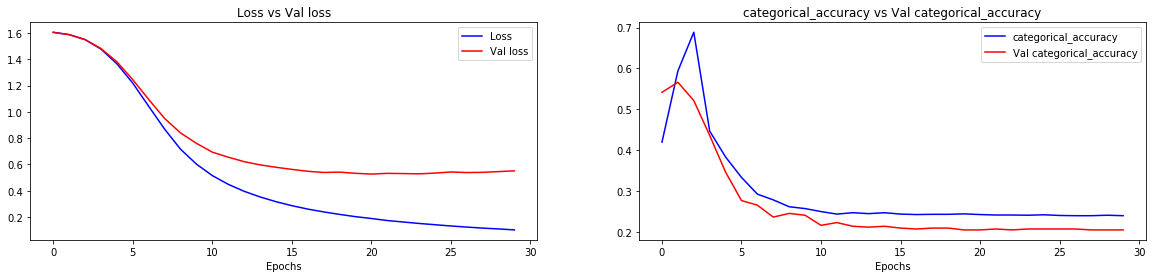

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(len(encoder.classes_), activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

dnn_history = model.fit(X_train, y_train, epochs=30, verbose=0, validation_data=(X_test, y_test))
plot_history(dnn_history, metric='categorical_accuracy')

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 16, 16)            475632    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 32)                4224      
_________________________________________________________________
dense_60 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_61 (Dense)             (None, 5)                 85        
Total params: 480,469
Trainable params: 480,469
Non-trainable params: 0
_________________________________________________________________


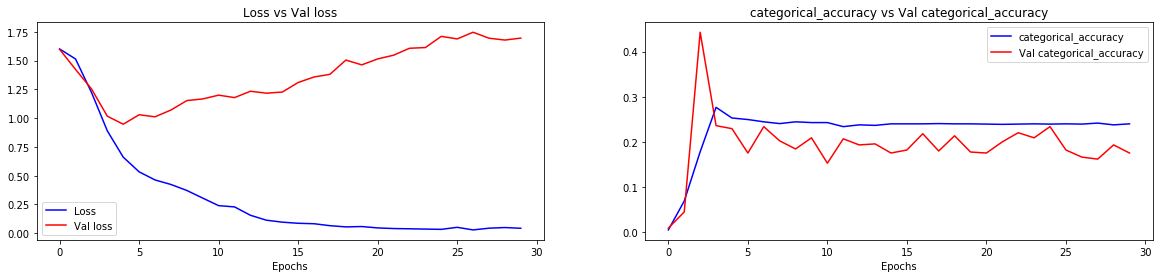

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=max_length),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(len(encoder.classes_), activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

lstm1_history = model.fit(X_train, y_train, epochs=30, verbose=0, validation_data=(X_test, y_test))
plot_history(lstm1_history, metric='categorical_accuracy')

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 16, 16)            475632    
_________________________________________________________________
lstm_10 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_62 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_63 (Dense)             (None, 5)                 85        
Total params: 478,101
Trainable params: 478,101
Non-trainable params: 0
_________________________________________________________________


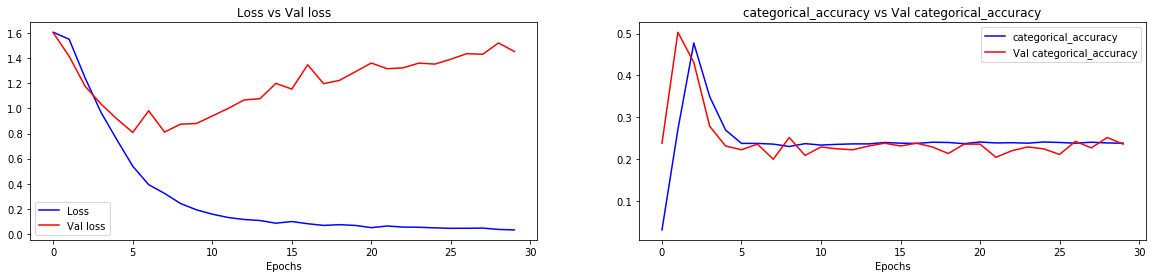

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=max_length),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.LSTM(16),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(len(encoder.classes_), activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

lstm2_history = model.fit(X_train, y_train, epochs=30, verbose=0, validation_data=(X_test, y_test))
plot_history(lstm2_history, metric='categorical_accuracy')

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, 16, 16)            475632    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 9, 64)             8256      
_________________________________________________________________
global_average_pooling1d_20  (None, 64)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_51 (Dense)             (None, 5)                 85        
Total params: 485,013
Trainable params: 485,013
Non-trainable params: 0
_________________________________________________________________


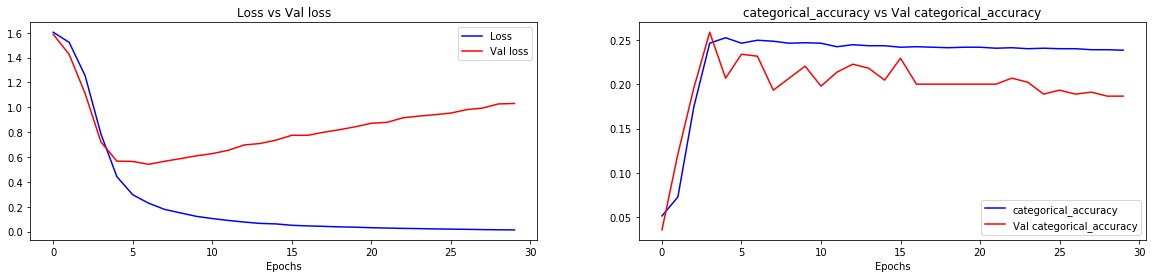

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=max_length),
    tf.keras.layers.Conv1D(64, 8, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(len(encoder.classes_), activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

cnn_history = model.fit(X_train, y_train, epochs=30, verbose=0, validation_data=(X_test, y_test))
plot_history(cnn_history, metric='categorical_accuracy')